In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
train_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')
df=train_data.copy()

In [ ]:
train_data.shape

(18208, 12)

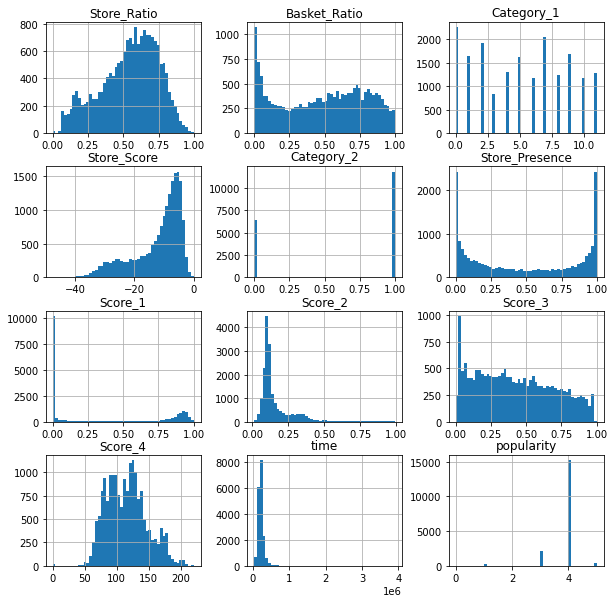

In [ ]:
df.hist(bins=50,figsize=(10,10));

In [ ]:
import scipy.stats as stat
from matplotlib import pylab
from pylab import *

In [ ]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) #1 row 2 columns
    df[feature].hist()
    plt.subplot(1,2,2) #1st row 2nd column 2nd index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

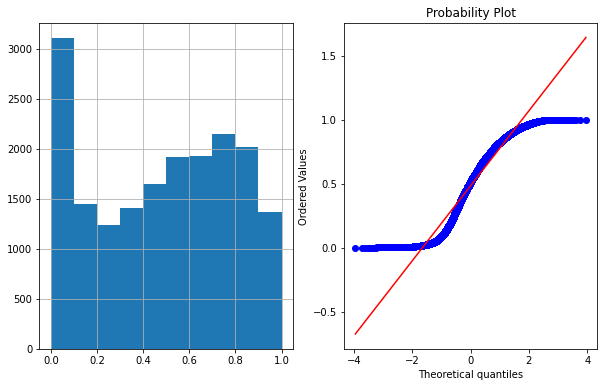

In [ ]:
plot_data(df,'Basket_Ratio')

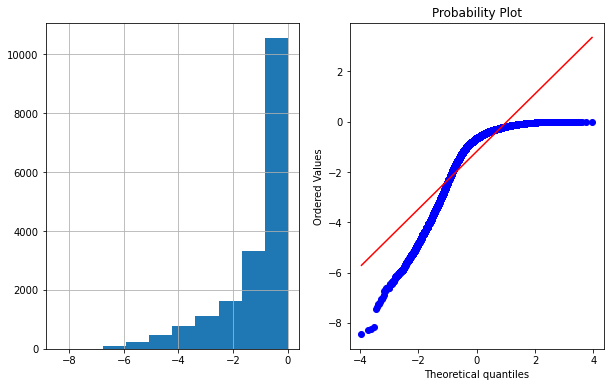

In [ ]:
import numpy as np
df['Basket_log']=np.log(df['Basket_Ratio'])
plot_data(df,'Basket_log')

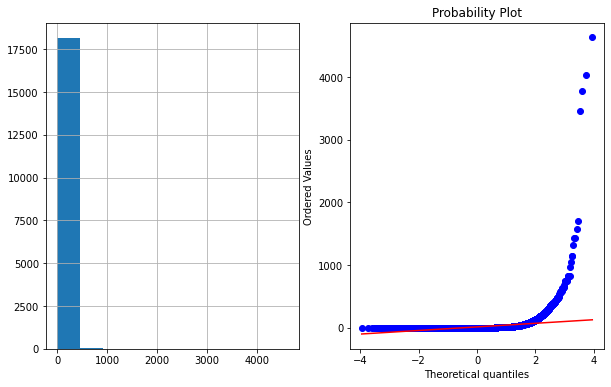

In [ ]:
df['Basket_REciprocal']=1/df.Basket_Ratio
plot_data(df,'Basket_REciprocal')

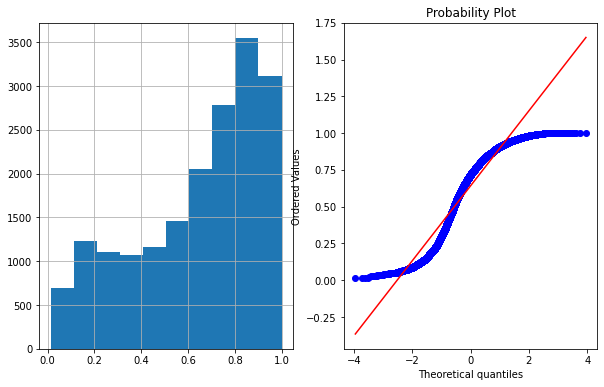

In [ ]:
df['Basket_square']=df.Basket_Ratio**(1/2)
plot_data(df,'Basket_square')

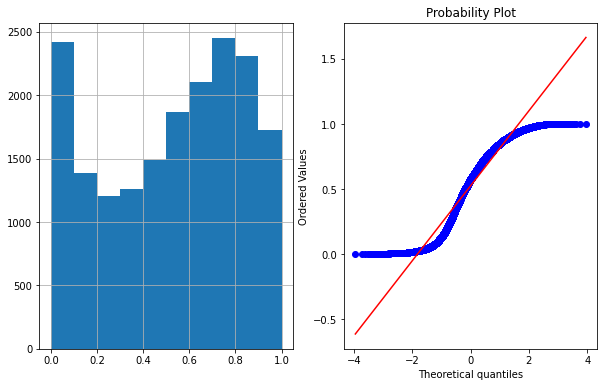

In [ ]:
df['Basket_Exponential']=df.Basket_Ratio**(1/1.2)
plot_data(df,'Basket_Exponential')

In [ ]:
#BOX COX TRANSFORMATION
df['Basket_Boxcox'],parameters=stat.boxcox(df['Basket_Ratio'])

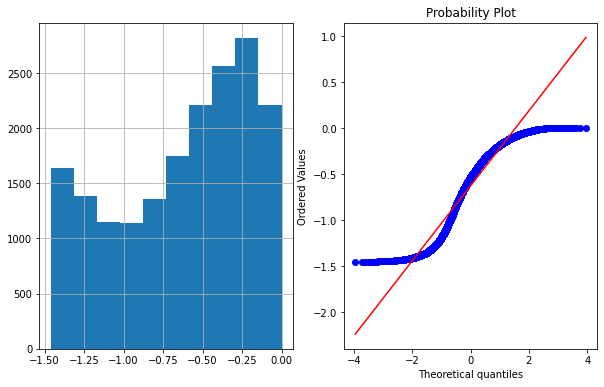

In [ ]:
plot_data(df,'Basket_Boxcox')

In [ ]:
#Basket_Exponential

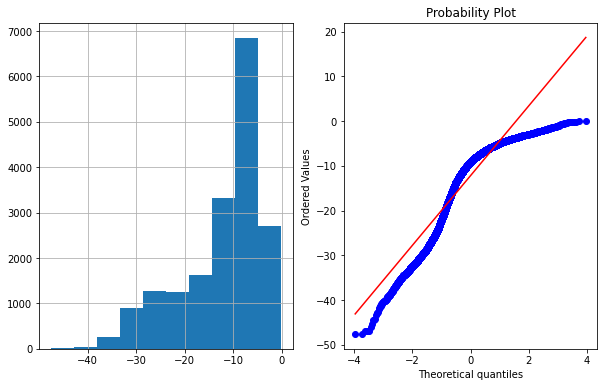

In [ ]:
plot_data(df,'Store_Score')

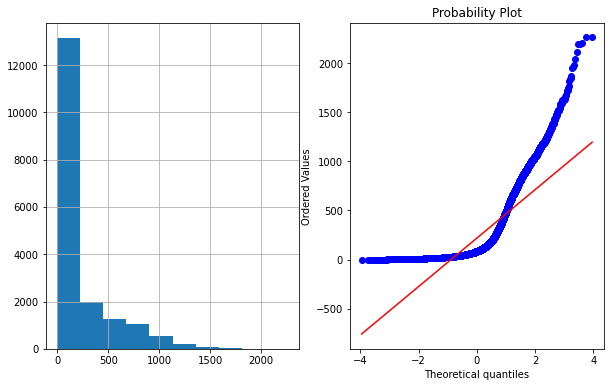

In [ ]:
df['Store_square']=df.Store_Score**(2)
plot_data(df,'Store_square')

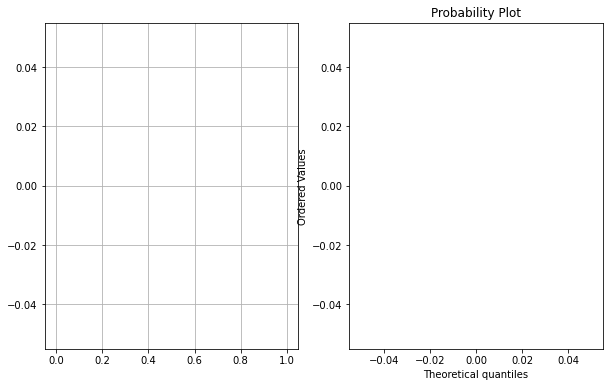

In [ ]:
df['Store_Exponential']=df.Store_Score**(1/1.2)
plot_data(df,'Store_Exponential')

In [ ]:
df.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [ ]:
# df['popularity']=df['popularity'].apply(lambda x:str(x).replace('5','2')).astype('int')

In [ ]:
df['popularity'].value_counts()

4    15231
3     2166
5      472
1      323
0       16
Name: popularity, dtype: int64

In [ ]:
df.dtypes

Store_Ratio       float64
Basket_Ratio      float64
Category_1          int64
Store_Score       float64
Category_2          int64
Store_Presence    float64
Score_1           float64
Score_2           float64
Score_3           float64
Score_4           float64
time                int64
popularity          int64
dtype: object

In [ ]:
df['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour
df['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month
df['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day
df['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year
df['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Ratio,18208.0,0.544283,0.202709,0.000000,0.411000,0.573000,0.69900,0.998
Basket_Ratio,18208.0,0.483585,0.302010,0.000216,0.200000,0.517000,0.74200,1.000
Category_1,18208.0,5.155536,3.535068,0.000000,2.000000,5.000000,8.00000,11.000
Store_Score,18208.0,-12.198086,8.370566,-47.576000,-16.496250,-9.166500,-5.94375,-0.079
Category_2,18208.0,0.648506,0.477450,0.000000,0.000000,1.000000,1.00000,1.000
Store_Presence,18208.0,0.477702,0.380634,0.000000,0.086175,0.430000,0.89500,0.996
Score_1,18208.0,0.322109,0.413493,0.000000,0.000001,0.002245,0.85900,1.000
Score_2,18208.0,0.164888,0.136531,0.011900,0.095300,0.112000,0.17600,0.991
Score_3,18208.0,0.421440,0.271922,0.000000,0.184750,0.393000,0.64000,0.999
Score_4,18208.0,115.305776,31.478303,0.000000,90.974250,114.022500,134.99700,219.701


In [ ]:
y = df[['popularity']]
df = df.drop(["popularity","time"],1)

In [ ]:
X = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X,1)
X

array([[0.40781563, 0.00358477, 0.18181818, ..., 0.1       , 0.        ,
        0.54237288],
       [0.23446894, 0.10480664, 0.        , ..., 0.1       , 0.        ,
        0.81355932],
       [0.66933868, 0.7259408 , 0.81818182, ..., 0.05      , 0.        ,
        0.83050847],
       ...,
       [0.16833667, 0.00886592, 0.45454545, ..., 0.05      , 0.        ,
        0.93220339],
       [0.5991984 , 0.65792611, 0.09090909, ..., 0.05      , 0.        ,
        0.37288136],
       [0.58316633, 0.32385395, 0.18181818, ..., 0.1       , 0.        ,
        0.91525424]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [ ]:
X_train.shape

(17297, 15)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
clf.score(X_train,y_train)

0.2766375672081864

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=40)
dt_clf = DecisionTreeClassifier(max_depth=20, min_samples_split=190)
svc = SVC(kernel="poly", degree=3, C=50)
knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=2)


In [ ]:
classifiers = [("knn", knn_clf), ("svc", svc), ("dt", dt_clf), ("rf_clf", rf_clf)]
voting_clf = VotingClassifier(estimators=classifiers, voting="hard")
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: ignored

In [ ]:
voting_clf.score(X_test, y_test)*100

87.70581778265642

In [ ]:
voting_clf.score(X_train, y_train)*100

97.2885471469041

In [ ]:
y_predss=voting_clf.predict(X_test)

In [ ]:
print ("Accuracy of test set",accuracy_score(y_test, y_predss)*100,"%")

Accuracy of test set 87.70581778265642 %


In [ ]:
class_weight=dict({4:60,0:100,3:85,5:90,1:90})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000,class_weight=class_weight,verbose = 1,n_jobs = -1,random_state = 42)

In [ ]:
%%time

clf.fit(X_train, y_train)

pred_new = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   21.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapse

CPU times: user 43.3 s, sys: 438 ms, total: 43.7 s
Wall time: 22.6 s


In [ ]:
pred_new = clf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [ ]:
print ("Accuracy of test set",accuracy_score(y_test, pred_new)*100,"%")

Accuracy of test set 89.24259055982436 %


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [ ]:
easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=

EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics

In [ ]:
y_preda=easy.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_preda))
print("\n")
print("accuracy Score:")
print(metrics.accuracy_score(y_test,y_preda))
print("\n")
print(metrics.classification_report(y_test,y_preda))

Confusion Matrix:
[[  2   0   0   0   0]
 [  0   5   3   1   2]
 [  0  24  39  23  29]
 [  0  96 153 446  66]
 [  0   8   7   2   5]]


accuracy Score:
0.5455543358946213


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.04      0.45      0.07        11
           3       0.19      0.34      0.25       115
           4       0.94      0.59      0.72       761
           5       0.05      0.23      0.08        22

    accuracy                           0.55       911
   macro avg       0.44      0.52      0.42       911
weighted avg       0.82      0.55      0.64       911



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
clf.score(X_train,y_train)

0.3925480715469592

In [ ]:
from xgboost import XGBClassifier
#for x in range(2,20):
xgb = XGBClassifier(base_score=0.5, booster='dart',num_class=5, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, bagging_fraction=0.8,bagging_freq=1,max_bin= 255, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1, predictor='gpu_predictor')

#Training the classifier
xgb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(bagging_fraction=0.8, bagging_freq=1, base_score=0.5,
              booster='dart', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_bin=255,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, num_class=5,
              objective='multi:softprob', predictor='gpu_predictor',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(X_train,y_train)

0.855755333294791

In [ ]:
predd=xgb.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,predd)

0.8419319429198683

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
from collections import Counter

In [ ]:
pred_log = clf.predict_proba(X_test)
print ("log loss of test set",log_loss(y_test, pred_log))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s


log loss of test set 0.3362938412561886


[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [ ]:
pred_logs = voting_clf.predict_proba(X_test)
print ("log loss of test set",log_loss(y_test, pred_logs))

AttributeError: ignored

In [ ]:
df = pd.read_csv("Test.csv")

In [ ]:
df.shape

(12140, 11)

In [ ]:
df['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour
df['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month
df['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day
df['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year
df['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute
df = df.drop(["time"],1)

In [ ]:
X = df

In [ ]:
df

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,hour,month,day,year,minute
0,0.164,0.994,1,-23.718,0,0.12400,0.991000,0.7890,0.00001,127.602,17,1,3,1970,40
1,0.586,0.636,4,-7.710,1,0.00208,0.322000,0.1070,0.35500,136.337,22,1,3,1970,27
2,0.457,0.743,0,-7.591,1,0.40400,0.009310,0.2010,0.68800,154.902,11,1,3,1970,54
3,0.423,0.748,5,-9.832,1,0.03000,0.221000,0.1690,0.42800,93.977,18,1,4,1970,20
4,0.802,0.756,2,-10.791,0,0.08430,0.007650,0.0521,0.96300,131.715,8,1,4,1970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12135,0.171,0.118,2,-25.360,1,0.86100,0.871000,0.0932,0.05390,78.303,5,1,3,1970,20
12136,0.744,0.859,11,-3.166,1,0.02560,0.000063,0.0881,0.78700,91.977,16,1,3,1970,39
12137,0.572,0.852,6,-4.712,0,0.00105,0.000000,0.0844,0.37800,129.969,12,1,3,1970,6
12138,0.761,0.525,11,-6.900,1,0.44000,0.000007,0.0921,0.53100,80.870,18,1,3,1970,20


In [ ]:
X = scaler.transform(X)
X

array([[0.16432866, 0.9939987 , 0.09090909, ..., 0.1       , 0.        ,
        0.6779661 ],
       [0.58717435, 0.63592136, 0.36363636, ..., 0.1       , 0.        ,
        0.45762712],
       [0.45791583, 0.74294448, 0.        , ..., 0.1       , 0.        ,
        0.91525424],
       ...,
       [0.57314629, 0.85196803, 0.54545455, ..., 0.1       , 0.        ,
        0.10169492],
       [0.76252505, 0.52489738, 1.        , ..., 0.1       , 0.        ,
        0.33898305],
       [0.34168337, 0.19682651, 0.81818182, ..., 0.        , 0.        ,
        0.27118644]])

In [ ]:
predsss=voting_clf.predict(X)

In [ ]:
predsss

array([3, 4, 4, ..., 4, 4, 4])

In [ ]:
a=pd.DataFrame(predsss)

In [ ]:
a.head()

,0
0,3
1,4
2,4
3,4
4,4


In [ ]:
b=pd.get_dummies(a[0])

In [ ]:
b.head()

,0,1,3,4,5
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
b.to_csv('out1.csv')

In [ ]:
X.shape

(12140, 15)

In [ ]:
pred_log = clf.predict_proba(X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.6s finished


In [ ]:
pred_log

array([[0.   , 0.085, 0.08 , 0.32 , 0.515],
       [0.   , 0.002, 0.007, 0.017, 0.974],
       [0.   , 0.009, 0.005, 0.041, 0.945],
       ...,
       [0.   , 0.001, 0.005, 0.013, 0.981],
       [0.   , 0.   , 0.   , 0.003, 0.997],
       [0.   , 0.053, 0.04 , 0.274, 0.633]])

In [ ]:
prediction  = pd.DataFrame(pred_log,columns =['0','1','3','4','5'])
prediction

,0,1,3,4,5
0,0.0,0.085,0.080,0.320,0.515
1,0.0,0.002,0.007,0.017,0.974
2,0.0,0.009,0.005,0.041,0.945
3,0.0,0.008,0.025,0.045,0.922
4,0.0,0.000,0.000,0.000,1.000
...,...,...,...,...,...
12135,0.0,0.021,0.028,0.104,0.847
12136,0.0,0.003,0.003,0.017,0.977
12137,0.0,0.001,0.005,0.013,0.981
12138,0.0,0.000,0.000,0.003,0.997


In [ ]:
prediction.to_csv('result_MP4.csv',index=False)